In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
x=dataset.drop(columns=['Outcome'],axis=1)
y=dataset['Outcome']
from sklearn.preprocessing import StandardScaler
src=StandardScaler()
x=src.fit_transform(x)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.28,random_state=0,shuffle=True)

In [10]:
model=DecisionTreeClassifier()
model=model.fit(x_train,y_train)

[Text(0.5349806882022472, 0.9722222222222222, 'x[1] <= 0.739\ngini = 0.463\nsamples = 552\nvalue = [351, 201]'),
 Text(0.2778265449438202, 0.9166666666666666, 'x[7] <= -0.403\ngini = 0.377\nsamples = 425\nvalue = [318, 107]'),
 Text(0.1271067415730337, 0.8611111111111112, 'x[5] <= -0.196\ngini = 0.207\nsamples = 222\nvalue = [196, 26]'),
 Text(0.06179775280898876, 0.8055555555555556, 'x[0] <= 0.937\ngini = 0.036\nsamples = 108\nvalue = [106, 2]'),
 Text(0.05056179775280899, 0.75, 'x[6] <= 0.604\ngini = 0.019\nsamples = 107\nvalue = [106, 1]'),
 Text(0.03932584269662921, 0.6944444444444444, 'gini = 0.0\nsamples = 94\nvalue = [94, 0]'),
 Text(0.06179775280898876, 0.6944444444444444, 'x[6] <= 0.644\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.05056179775280899, 0.6388888888888888, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07303370786516854, 0.6388888888888888, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.07303370786516854, 0.75, 'gini = 0.0\nsamples = 1\nvalu

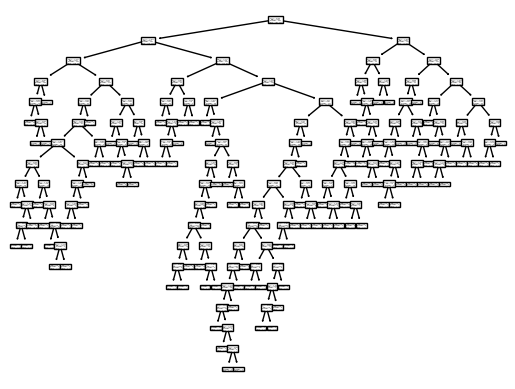

In [11]:
tree.plot_tree(model)

In [12]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       149
           1       0.57      0.55      0.56        67

    accuracy                           0.73       216
   macro avg       0.69      0.68      0.68       216
weighted avg       0.73      0.73      0.73       216



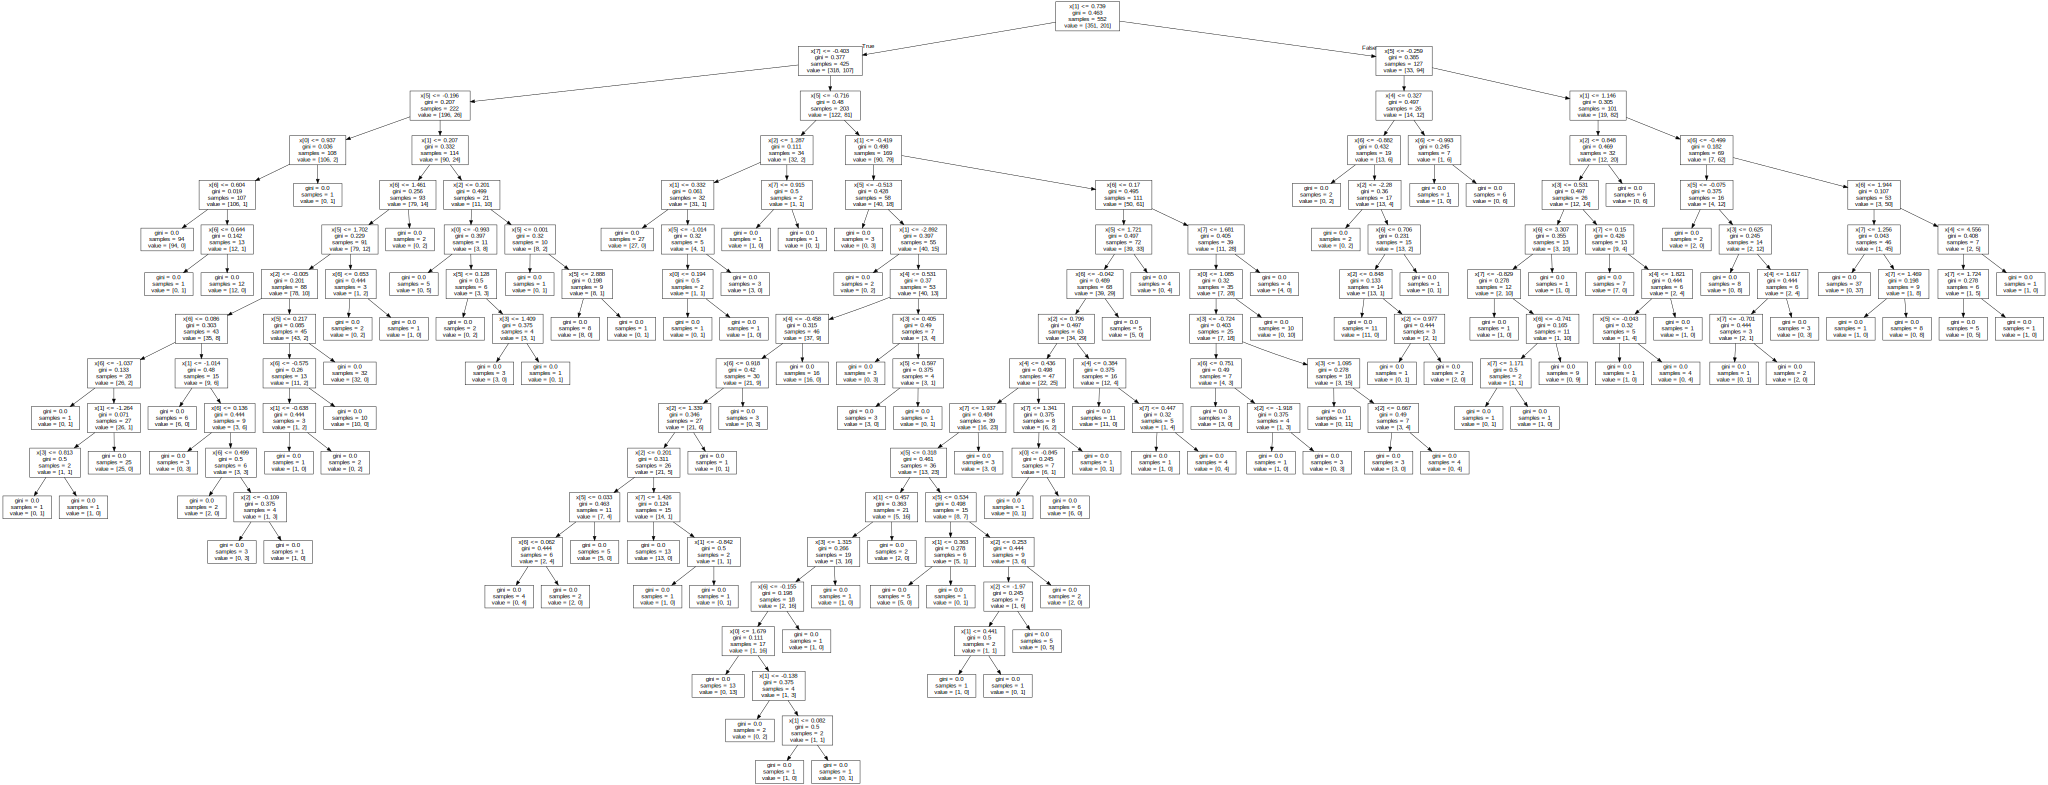

In [21]:
import graphviz
data=tree.export_graphviz(model,out_file=None)
graph=graphviz.Source(data)
graph